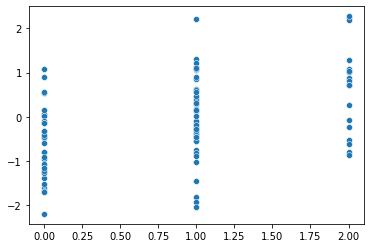

In [1]:
from latentcor import gen_data, get_tps, latentcor
simdata = gen_data(n = 100, tps = ["ter", "con"], showplot = True)

In [2]:
len(simdata)

2

In [3]:
print(simdata['X'][ : 6, : ])

[[ 1.          0.30891851]
 [ 1.         -0.17183692]
 [ 0.         -0.3247789 ]
 [ 2.          0.88417791]
 [ 0.         -0.79998359]
 [ 0.          0.06306974]]


In [4]:
print(simdata['plotX'])

AxesSubplot(0.125,0.125;0.775x0.755)


In [6]:
estimate = latentcor(simdata['X'], tps = ["ter", "con"])

In [7]:
len(estimate)

5

In [8]:
estimate['zratios']

array([[0.3, nan],
       [0.8, nan]])

In [9]:
estimate['K']

,0,1
0,1.000000,0.275556
1,0.275556,1.000000


In [10]:
estimate['Rpointwise']

,0,1
0,1.000000,0.499314
1,0.499314,1.000000


In [11]:
estimate['R']

,0,1
0,1.000000,0.498815
1,0.498815,1.000000


In [13]:
estimate['plot']

In [14]:
import numpy as np
import pandas as pd
from pyreadr import read_r

In [15]:
housing = read_r('housing.rdata')['housing']

In [16]:
print(housing.iloc[ :6, : ])

    price lotsize bedrooms bathrms stories driveway recroom fullbase gashw  \
1   42000    5850        3       1       2      yes      no      yes    no   
2   38500    4000        2       1       1      yes      no       no    no   
3   49500    3060        3       1       1      yes      no       no    no   
4   60500    6650        3       1       2      yes     yes       no    no   
5   61000    6360        2       1       1      yes      no       no    no   
6   66000    4160        3       1       1      yes     yes      yes    no   

  airco garagepl prefarea  
1    no        1       no  
2    no        0       no  
3    no        0       no  
4    no        0       no  
5    no        0       no  
6   yes        0       no  


In [17]:
print(np.unique(housing['bedrooms']))
print(np.unique(housing['bathrms']))
print(np.unique(housing['stories']))
print(np.unique(housing['driveway']))
print(np.unique(housing['recroom']))
print(np.unique(housing['fullbase']))
print(np.unique(housing['gashw']))
print(np.unique(housing['airco']))
print(np.unique(housing['garagepl']))
print(np.unique(housing['prefarea']))

['1' '2' '3' '4' '5' '6']
['1' '2' '3' '4']
['1' '2' '3' '4']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['0' '1' '2' '3']
['no' 'yes']


In [18]:
housing = housing.replace('no', 0)

In [19]:
housing = housing.replace('yes', 1)

In [20]:
print(housing)

      price lotsize bedrooms bathrms stories  driveway  recroom  fullbase  \
1     42000    5850        3       1       2         1        0         1   
2     38500    4000        2       1       1         1        0         0   
3     49500    3060        3       1       1         1        0         0   
4     60500    6650        3       1       2         1        1         0   
5     61000    6360        2       1       1         1        0         0   
..      ...     ...      ...     ...     ...       ...      ...       ...   
542   91500    4800        3       2       4         1        1         0   
543   94000    6000        3       2       4         1        0         0   
544  103000    6000        3       2       4         1        1         0   
545  105000    6000        3       2       2         1        1         0   
546  105000    6000        3       1       2         1        0         0   

     gashw  airco garagepl  prefarea  
1        0      0        1         0

In [21]:
print(housing.iloc[ :6, : ])

    price lotsize bedrooms bathrms stories  driveway  recroom  fullbase  \
1   42000    5850        3       1       2         1        0         1   
2   38500    4000        2       1       1         1        0         0   
3   49500    3060        3       1       1         1        0         0   
4   60500    6650        3       1       2         1        1         0   
5   61000    6360        2       1       1         1        0         0   
6   66000    4160        3       1       1         1        1         1   

   gashw  airco garagepl  prefarea  
1      0      0        1         0  
2      0      0        0         0  
3      0      0        0         0  
4      0      0        0         0  
5      0      0        0         0  
6      0      1        0         0  


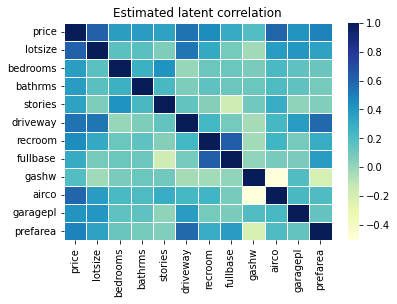

In [22]:
from latentcor import latentcor, get_tps
estimate_housing = latentcor(housing, tps = ["con", "con", "con", "con",
                  "con", "bin", "bin", "bin", "bin", "bin", "tru", "bin"], use_nearPD=False, method = "original", showplot = True)

In [24]:
get_tps(housing)

ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.
ordinal levels between 4 and 10 will be approximated by either countinuous or truncated type.


array(['con', 'con', 'con', 'con', 'con', 'bin', 'bin', 'bin', 'bin',
       'bin', 'tru', 'bin'], dtype='<U3')

Text(0.5, 1.0, 'Histogram of garagepl')

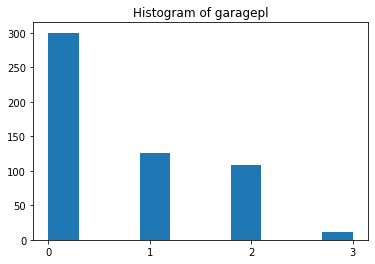

In [25]:
import matplotlib.pyplot as plt
plt.hist(np.sort(housing['garagepl']))
plt.title('Histogram of garagepl')

In [26]:
len(estimate_housing)

5

In [28]:
estimate_housing['zratios']

array([[       nan,        nan,        nan,        nan,        nan,
        0.14102564, 0.82234432, 0.65018315, 0.95421245, 0.68315018,
        0.54945055, 0.76556777],
       [       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan]])

In [29]:
np.round(estimate_housing['K'], decimals=3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000,0.420,0.238,0.247,0.227,0.137,0.132,0.126,0.021,0.247,0.218,0.170
lotsize,0.420,1.000,0.105,0.110,0.038,0.135,0.093,0.035,-0.003,0.153,0.213,0.121
bedrooms,0.238,0.105,1.000,0.174,0.277,-0.002,0.036,0.051,0.008,0.088,0.079,0.044
bathrms,0.247,0.110,0.174,1.000,0.144,0.015,0.046,0.046,0.013,0.084,0.081,0.029
stories,0.227,0.038,0.277,0.144,1.000,0.036,0.012,-0.068,0.010,0.118,0.009,0.018
driveway,0.137,0.135,-0.002,0.015,0.036,1.000,0.025,0.014,-0.002,0.034,0.071,0.059
recroom,0.132,0.093,0.036,0.046,0.012,0.025,1.000,0.136,-0.002,0.049,0.020,0.052
fullbase,0.126,0.035,0.051,0.046,-0.068,0.014,0.136,1.000,0.001,0.020,0.024,0.093
gashw,0.021,-0.003,0.008,0.013,0.010,-0.002,-0.002,0.001,1.000,-0.025,0.018,-0.010
airco,0.247,0.153,0.088,0.084,0.118,0.034,0.049,0.020,-0.025,1.000,0.076,0.046


In [30]:
np.round(estimate_housing['Rpointwise'], decimals=3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000,0.612,0.365,0.378,0.349,0.546,0.449,0.300,0.191,0.599,0.411,0.486
lotsize,0.612,1.000,0.164,0.172,0.060,0.537,0.315,0.083,-0.031,0.378,0.402,0.347
bedrooms,0.365,0.164,1.000,0.270,0.421,-0.006,0.122,0.121,0.073,0.218,0.152,0.128
bathrms,0.378,0.172,0.270,1.000,0.224,0.060,0.155,0.111,0.118,0.208,0.156,0.084
stories,0.349,0.060,0.421,0.224,1.000,0.144,0.042,-0.162,0.094,0.292,0.017,0.053
driveway,0.546,0.537,-0.006,0.060,0.144,1.000,0.240,0.089,-0.039,0.231,0.380,0.582
recroom,0.449,0.315,0.122,0.155,0.042,0.240,1.000,0.619,-0.033,0.248,0.081,0.297
fullbase,0.300,0.083,0.121,0.111,-0.162,0.089,0.619,1.000,0.013,0.076,0.069,0.381
gashw,0.191,-0.031,0.073,0.118,0.094,-0.039,-0.033,0.013,1.000,-0.508,0.196,-0.205
airco,0.599,0.378,0.218,0.208,0.292,0.231,0.248,0.076,-0.508,1.000,0.226,0.201


In [31]:
np.round(estimate_housing['R'], decimals=3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
price,1.000,0.612,0.365,0.378,0.349,0.546,0.449,0.300,0.191,0.599,0.411,0.486
lotsize,0.612,1.000,0.164,0.172,0.060,0.537,0.315,0.083,-0.031,0.378,0.402,0.347
bedrooms,0.365,0.164,1.000,0.270,0.421,-0.006,0.122,0.121,0.073,0.218,0.152,0.128
bathrms,0.378,0.172,0.270,1.000,0.224,0.060,0.155,0.111,0.118,0.208,0.156,0.084
stories,0.349,0.060,0.421,0.224,1.000,0.144,0.042,-0.162,0.094,0.292,0.017,0.053
driveway,0.546,0.537,-0.006,0.060,0.144,1.000,0.240,0.089,-0.039,0.231,0.380,0.582
recroom,0.449,0.315,0.122,0.155,0.042,0.240,1.000,0.619,-0.033,0.248,0.081,0.297
fullbase,0.300,0.083,0.121,0.111,-0.162,0.089,0.619,1.000,0.013,0.076,0.069,0.381
gashw,0.191,-0.031,0.073,0.118,0.094,-0.039,-0.033,0.013,1.000,-0.508,0.196,-0.205
airco,0.599,0.378,0.218,0.208,0.292,0.231,0.248,0.076,-0.508,1.000,0.226,0.201


In [33]:
estimate_housing['plot']

[Text(0.5, 1.0, 'Estimated latent correlation')]